# Dimensionality Reduction
## Topics
- Principal Component Analysis (PCA)
- Singular Value Decomposition (SVD)
- Factor Analysis
- Multidimensional Scaling (MDS)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load dataset 
file_path = "KosteckiDillon.csv"
data = pd.read_csv(file_path)

## Preprocessing
### Handle missing values, categorical encoding, and scaling

In [3]:
# Handling missing values
data_clean = data.dropna()  
label_encoder = LabelEncoder()

# Encoding categorical variables
data_clean['hatype'] = label_encoder.fit_transform(data_clean['hatype'])
data_clean['medication'] = label_encoder.fit_transform(data_clean['medication'])
data_clean['headache'] = label_encoder.fit_transform(data_clean['headache'])
data_clean['sex'] = label_encoder.fit_transform(data_clean['sex'])

In [4]:
# Selecting numerical columns
numerical_columns = data_clean.select_dtypes(include=['float64', 'int64']).columns
X = data_clean[numerical_columns]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Principal Component Analysis (PCA)

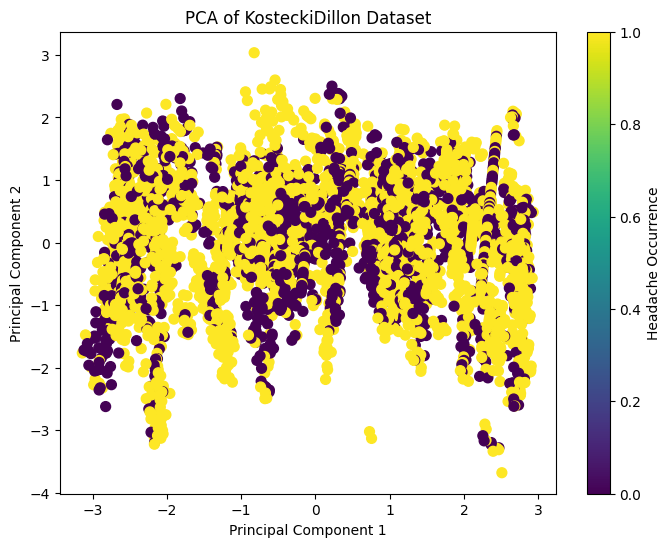

In [5]:
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data_clean['headache'], cmap='viridis', s=50)
plt.title("PCA of KosteckiDillon Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Headache Occurrence')
plt.show()

## Singular Value Decomposition (SVD)

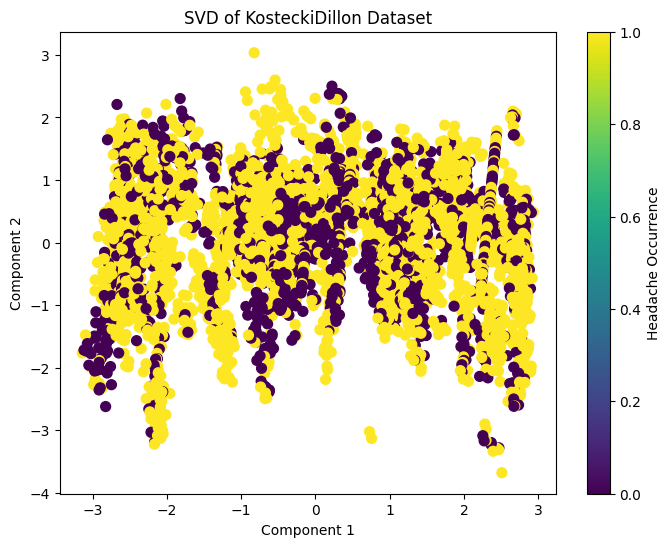

In [6]:
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=data_clean['headache'], cmap='viridis', s=50)
plt.title("SVD of KosteckiDillon Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label='Headache Occurrence')
plt.show()

## Factor Analysis

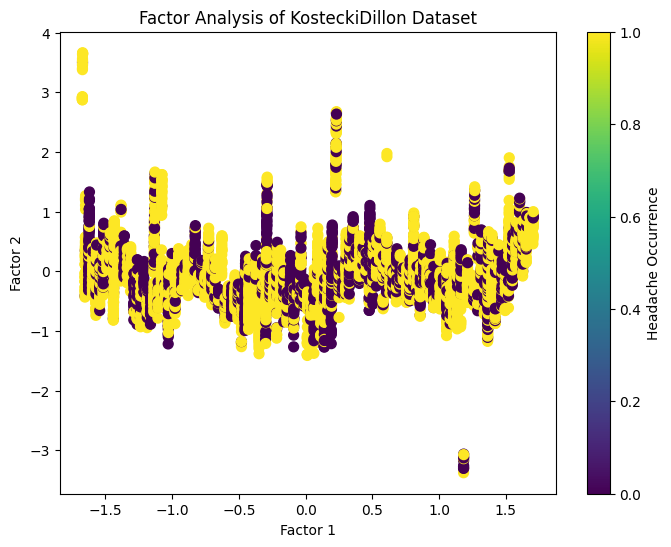

In [7]:
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=data_clean['headache'], cmap='viridis', s=50)
plt.title("Factor Analysis of KosteckiDillon Dataset")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.colorbar(label='Headache Occurrence')
plt.show()

## Multidimensional Scaling (MDS)

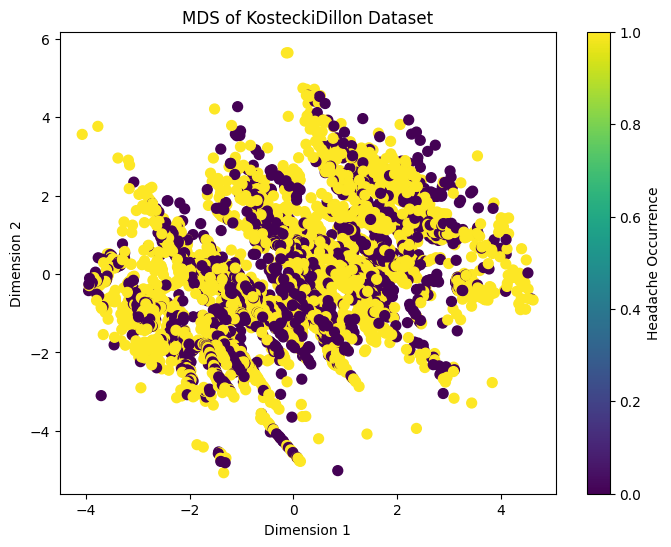

In [8]:
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=data_clean['headache'], cmap='viridis', s=50)
plt.title("MDS of KosteckiDillon Dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label='Headache Occurrence')
plt.show()